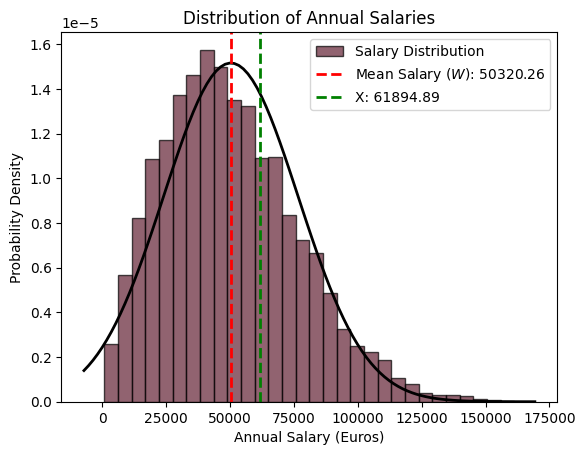

IQR (Interquartile Range): 36144.0
Range of data: 160394
Mean: 50320.26, Mode: 35049, Median: 47241.5, Std: 26314.451098884027, Variance: 692277224.0514, Kurtosis: 0.19252083575405443, Skewness: 0.6017233229282185


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Read the data from the CSV file 
data = pd.read_csv('data1-1 (1).csv', header=None, names=['Salary'])

def getStatisticalDescription(data):
    salary_data = data['Salary']
    mean = np.mean(salary_data)
    median = np.median(salary_data)
    mode = salary_data.mode().iloc[0]
    std = salary_data.std()
    variance = np.var(salary_data)
    kurtosis = salary_data.kurtosis()
    skewness = salary_data.skew()
    return mean, mode, median, std, variance, kurtosis, skewness


# Plot the histogram
plt.hist(data['Salary'], bins=30, density=True, alpha=0.7, color='#632134', edgecolor='black', label='Salary Distribution')

# Fit a normal distribution to the data
mu, std = norm.fit(data['Salary'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

# Plot the PDF
plt.plot(x, p, 'k', linewidth=2)

# Calculate and print the mean annual salary (W)
mean_salary = np.mean(data['Salary'])
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Mean Salary ($W$): {mean_salary:.2f}')

# Calculate and print the value X
mean_annual_salary = mu
percentile_33 = 0.33
X = norm.ppf(1 - percentile_33, loc=mu, scale=std)
plt.axvline(X, color='green', linestyle='dashed', linewidth=2, label=f'X: {X:.2f}')

# Add labels, title, and legend
plt.xlabel('Annual Salary (Euros)')
plt.ylabel('Probability Density')
plt.title('Distribution of Annual Salaries')
plt.legend()

# Show the plot
plt.show()

# Calculate measures of variability
Q1 = np.percentile(data['Salary'], 25)
Q3 = np.percentile(data['Salary'], 75)
iqr = Q3 - Q1
print(f"IQR (Interquartile Range): {iqr}")

data_range = data['Salary'].max() - data['Salary'].min()
print(f"Range of data: {data_range}")

# Call the function and print the extended statistical description
mean, mode, median, std, variance, kurtosis, skewness = getStatisticalDescription(data)
print(f"Mean: {mean}, Mode: {mode}, Median: {median}, Std: {std}, Variance: {variance}, Kurtosis: {kurtosis}, Skewness: {skewness}")
